In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv ('insurance.csv',sep=",") 
df


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


0 for female and 1 for male

---
smoker 1 and non smoker 0

---
northeast = 0
northwest = 1
souteast = 2
southwest = 3




In [9]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

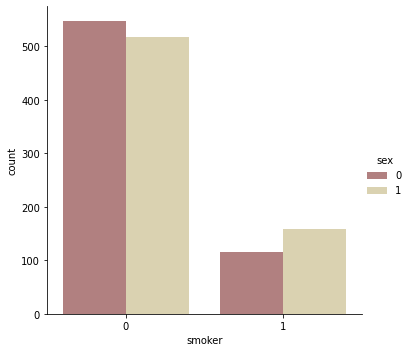

In [10]:
mm=sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

non smoker females are greater than non smoker males, and are both greater than 500

---
males who smoke are greater than female smokers, varies between 100 and 200


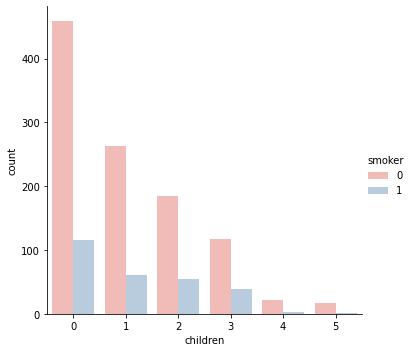

In [49]:
mm=sns.catplot(x="children", kind="count",hue = 'smoker', palette="Pastel1", data=df)

having children decreases the probability of being a smoker

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

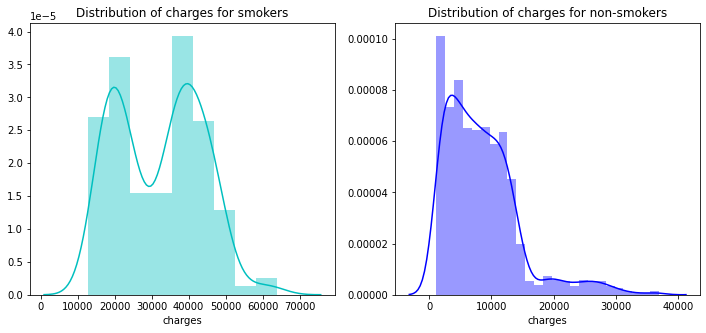

In [11]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

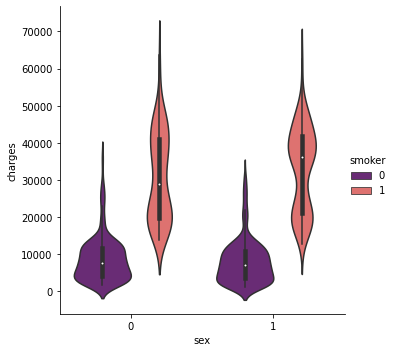

In [12]:
vv=sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')


smokers generally have greater charges than those who don't smoke

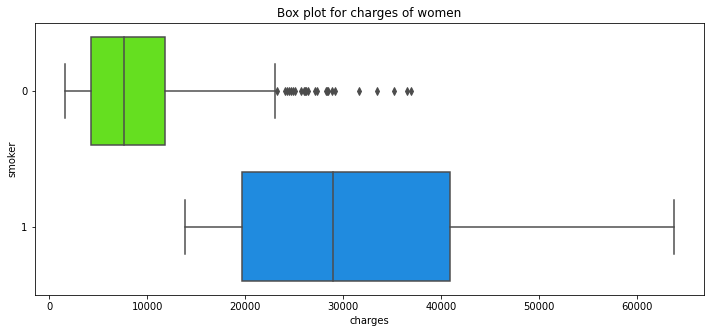

In [55]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
mm=sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'gist_rainbow')

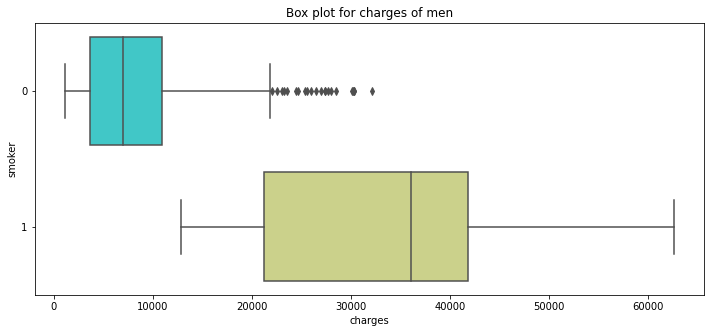

In [14]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
mm=sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'rainbow')

Now let s pay attention to the age of the patients. First, let s look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

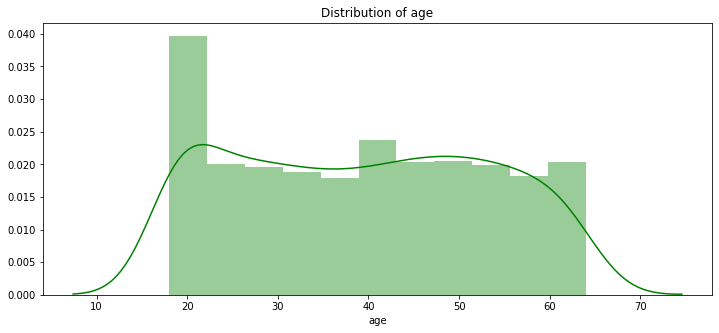

In [56]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (20 years old)')

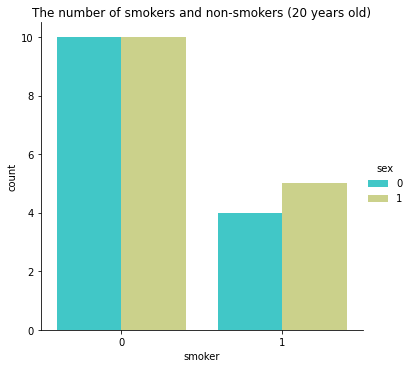

In [16]:
#20 yo are more present
mm=sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 20)])
plt.title("The number of smokers and non-smokers (20 years old)")

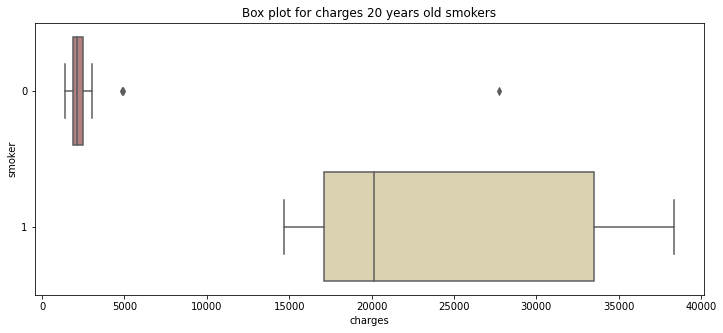

In [17]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 20 years old smokers")
mm=sns.boxplot(y="smoker", x="charges", data = df[(df.age == 20)] , orient="h", palette = 'pink')

As we can see, even at the age of 20 smokers spend much more on treatment than non-smokers. we can conclude that there s high correlation between smoking, age and charges.

---

average charges = 20000

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

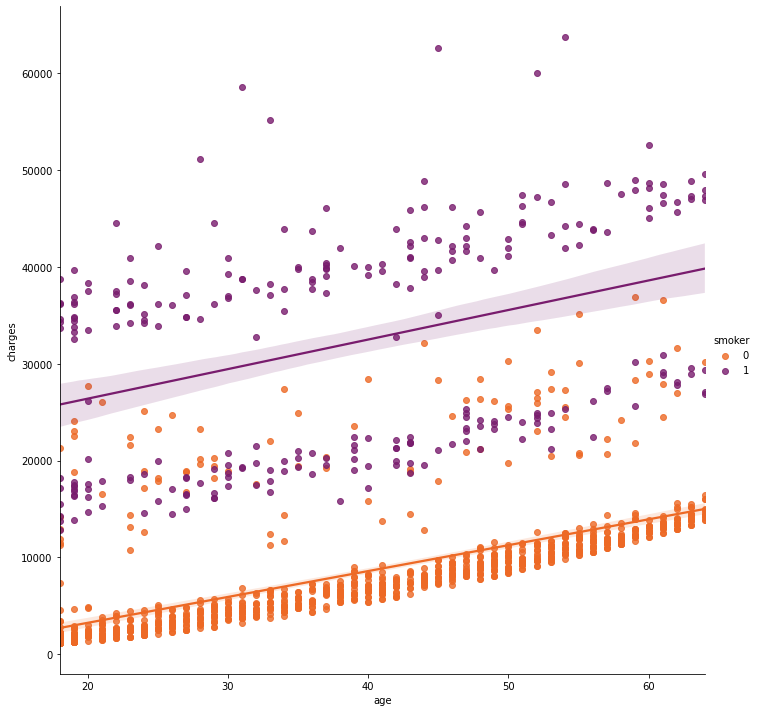

In [18]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', size = 10)
ax.set_title('Smokers and non-smokers')

As we can see, the increase of charges with age is quite certain however when it comes to the case of smokers we see a much greater amount of charges than those who don't smoke.

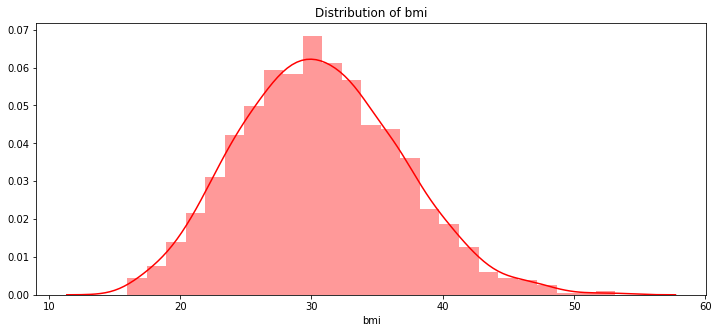

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'r')

In [20]:
#Turning BMI into Categorical Variables:

df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,0,27.900,0,1,3,16884.92400,Overweight
1,18,1,33.770,1,0,2,1725.55230,Obese
2,28,1,33.000,3,0,2,4449.46200,Obese
3,33,1,22.705,0,0,1,21984.47061,Normal Weight
4,32,1,28.880,0,0,1,3866.85520,Overweight


In [21]:
le.fit(df.weight_condition.drop_duplicates()) 
df.weight_condition = le.transform(df.weight_condition)
df.head()

,age,sex,bmi,children,smoker,region,charges,weight_condition
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,2


normal weight = 0
obese = 1
overweight = 2
underweight = 3

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

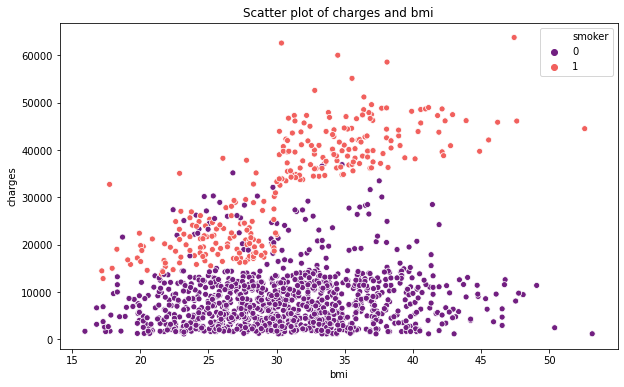

In [22]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')



/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


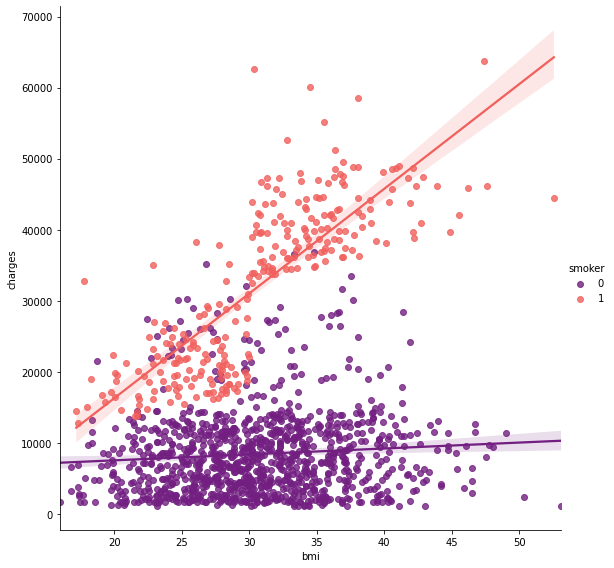

In [23]:
mm=sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma', size = 8)

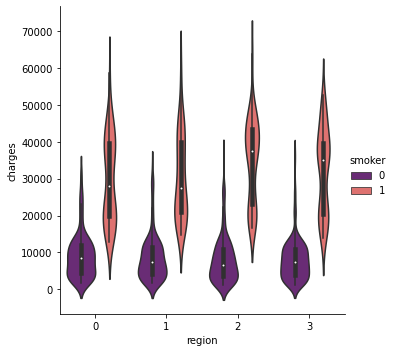

In [24]:
vv=sns.catplot(x="region", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

Based from above plot, we can disclose that region of origin doesn t have much impact with the amount of medical cost.

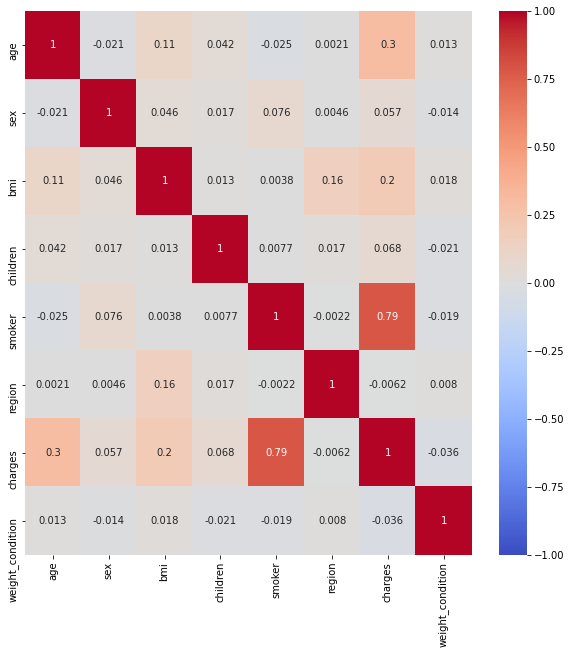

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

a high corr between smokers and charges and a slightly high corr between mbi-age and charges 

Text(0.5, 1.0, 'Just Obese 1.738')

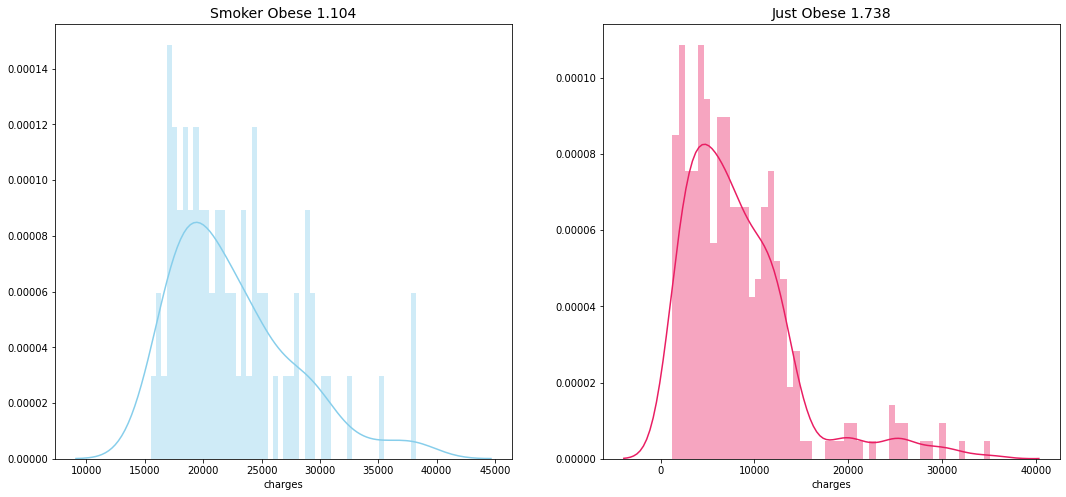

In [26]:
obese_smoker = df.loc[df['weight_condition'] == 2].loc[df['smoker'] == 1]
obese_nosmoker = df.loc[df['weight_condition'] == 2].loc[df['smoker'] == 0]

obese_smoker_skew = round(obese_smoker['charges'].skew(), 3) 
just_obese_skew = round(obese_nosmoker['charges'].skew(), 3) 

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))

sns.distplot(obese_smoker['charges'], bins=50, ax=ax1, color='skyblue')
ax1.set_title(f'Smoker Obese {obese_smoker_skew}',fontsize=14)

sns.distplot(obese_nosmoker['charges'], bins=50, ax=ax2, color='#E91E63')
ax2.set_title(f'Just Obese {just_obese_skew}', fontsize=14)

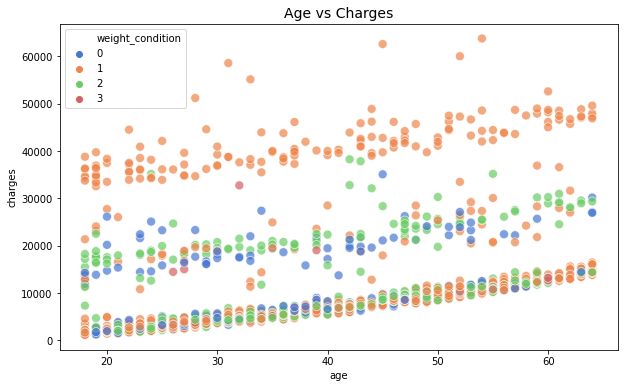

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', hue='weight_condition', data=df, palette='muted',legend="full",s=80, alpha=.7)
plt.title('Age vs Charges', fontsize=14)
plt.show()
#0 for the overweight
#1 for obese
#2 normal
#3 underweight

<Figure size 864x1440 with 0 Axes>

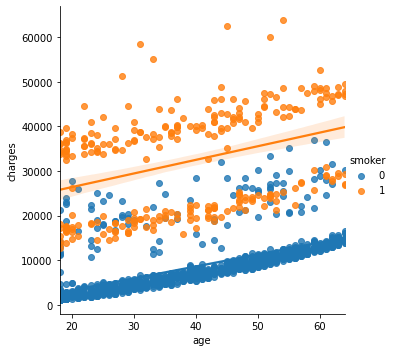

In [28]:
plt.figure(figsize=(12,20))
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')

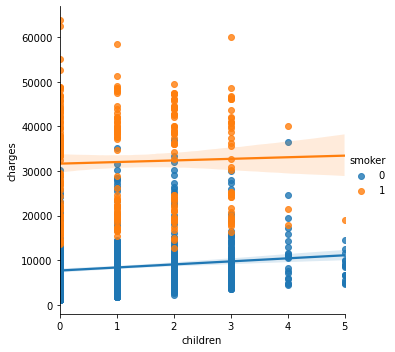

In [29]:
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker')

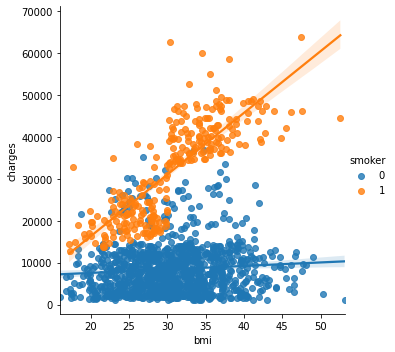

In [30]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')

In [31]:
df.groupby(by='sex')['charges'].mean()

sex
0    12569.578844
1    13956.751178
Name: charges, dtype: float64

In [39]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=df[["charges"]]
y=df["sex"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.51


In [40]:
x=df[["charges"]]
y=df["smoker"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.89


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 42)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)



confusion_matrix = pd.crosstab(y_test,y_pred, rownames=['sex'], colnames=['smoker'])
print( confusion_matrix)

smoker    0   1
sex            
0       206   8
1        14  40


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       214
           1       0.83      0.74      0.78        54

    accuracy                           0.92       268
   macro avg       0.88      0.85      0.87       268
weighted avg       0.92      0.92      0.92       268



In [63]:
#Choosing the features as x and the target as y
x=df[['charges']]
y=df['smoker']

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=1000) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))


Acuuracy= 0.7910447761194029


In [67]:
#decision tree

def preprocess_data(new_data):
    new_data['age'].fillna(new_data['age'].mean(),inplace=True)
    return new_data
data=preprocess_data(df)

In [68]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["smoker", "sex", "children", "bmi", "age"], axis=1)
y= data["charges"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

ValueError: ignored

In [ ]:
#Random Forest Code

from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy


data=pd.DataFrame({
'sepal length': iris.data[:,0],
'sepal width': iris.data[:,1],
'petal length': iris.data[:,2],
'petal width': iris.data[:,3], 
'species': iris.target
})

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']] #features
y=data['']  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%